Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
dataset1=pd.read_csv('50_Startups.csv')
dataset1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
dataset1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
dataset1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset1[dataset1.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [ ]:
# Checking for missing Null values
dataset1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
# Rename the columns
dataset1=dataset1.rename({'R&D Spend': 'RDS','Administration': 'ADM','Marketing Spend': 'MKS'},axis=1)
dataset1

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Correlation Analysis

In [ ]:
dataset1.corr()

,RDS,ADM,MKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

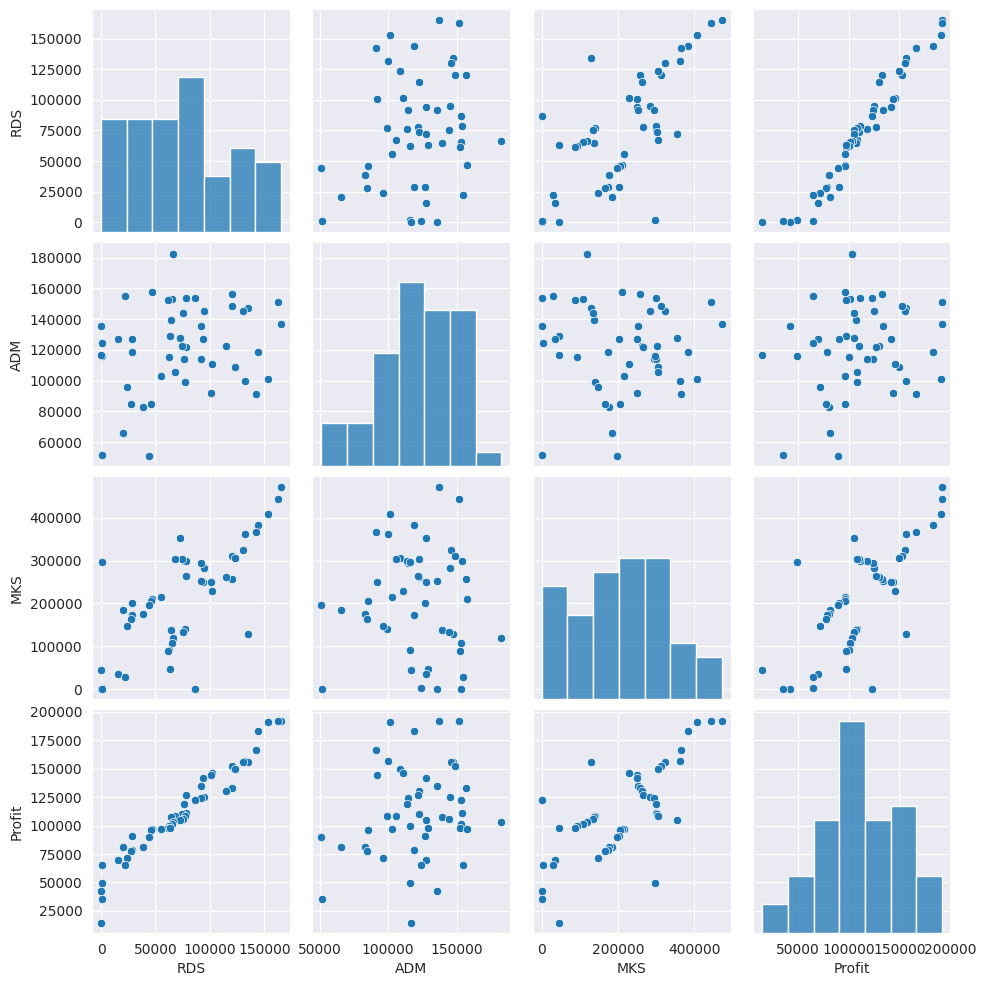

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(dataset1)

# Preparing Model

In [ ]:
# Build Model
# import statsmodels.formula.api as smf
model = smf.ols('Profit~RDS+ADM+MKS',data=dataset1).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           4.53e-30
Time:                        06:20:02   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKS            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Beta Coefficient
model.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MKS              0.027228
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           4.53e-30
Time:                        06:39:04   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKS            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
slr_adm = smf.ols('Profit~ADM',data=dataset1).fit()

In [ ]:
slr_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 15 Dec 2023   Prob (F-statistic):              0.162
Time:                        06:43:41   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
slr_mks=smf.ols('Profit~MKS',data=dataset1).fit()

In [ ]:
slr_mks.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           4.38e-10
Time:                        06:45:53   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MKS            0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Build the Multi Linear regression model of Adminstration and Marketing together to check for collinearity problem


In [ ]:
slr_AM = smf.ols('Profit~ADM+MKS',data=dataset1).fit()

In [ ]:
slr_AM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           2.50e-10
Time:                        06:49:13   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
MKS            0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
When we build the model together both of the columns have significant p value

#Model Validation Techniques
Two Techniques
- 1) Collinearity Check - VIF
- 2) Residual Analysis

Calculating Variance Inflation Factor (VIF) = 1/1-r^2

In [ ]:
rsq_rds = smf.ols('RDS~ADM+MKS',data=dataset1).fit().rsquared
vif_rds = 1/(1-rsq_rds)
vif_rds

2.4689030699947017

In [ ]:
rsq_adm = smf.ols('ADM~MKS+RDS',data=dataset1).fit().rsquared
vif_adm = 1/(1-rsq_adm)
vif_adm

1.1750910070550453

In [ ]:
rsq_mks = smf.ols('MKS~RDS+ADM',data=dataset1).fit().rsquared
vif_mks = 1/(1-rsq_mks)
vif_mks

2.326773290530878

In [ ]:
# Storing vif values in a data frame
d1 = {'Variables':['RDS','ADM','MKS'],'VIF':[vif_rds,vif_adm,vif_mks]}
VIF_Frame = pd.DataFrame(d1)
VIF_Frame

,Variables,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MKS,2.326773


Since No value of VIF is greater than 20 , we can say that there is no collinearity problem. So we shall consider all columns for building the model

#Residual Analysis
Test for Normality of Residuals (Q-Q Plot)


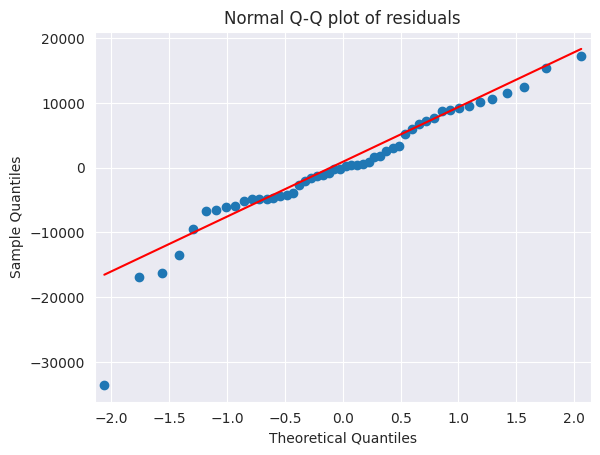

In [ ]:
import statsmodels.api as sm
sns.set_style(style='darkgrid')
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49])]

Residual Plot for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

<Axes: >

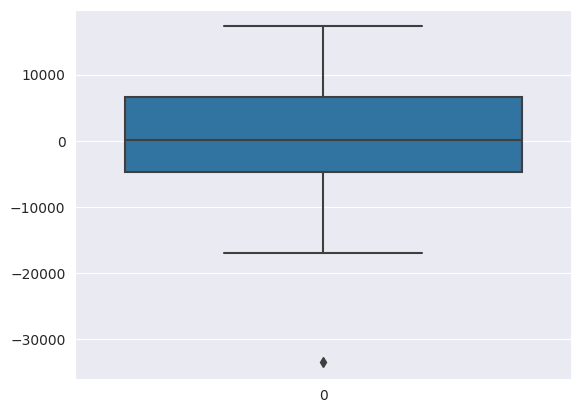

In [ ]:
sns.boxplot(model.resid)

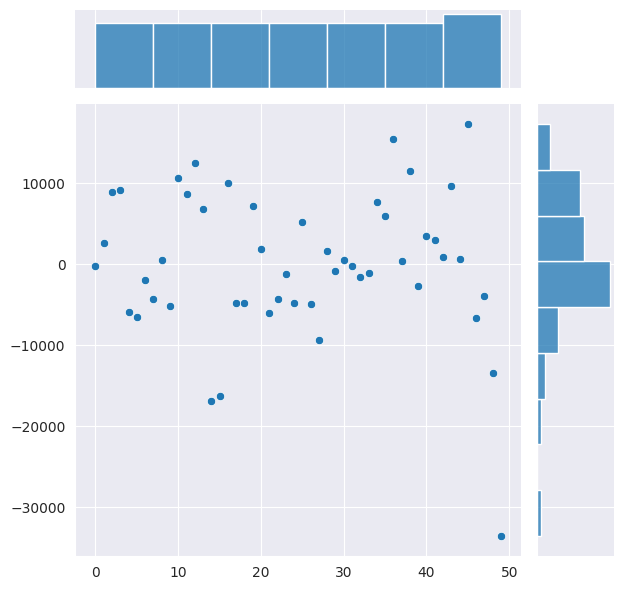

In [ ]:
sns.jointplot(model.resid)

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()  #User Defined Function Z = (x-mu)/sigma

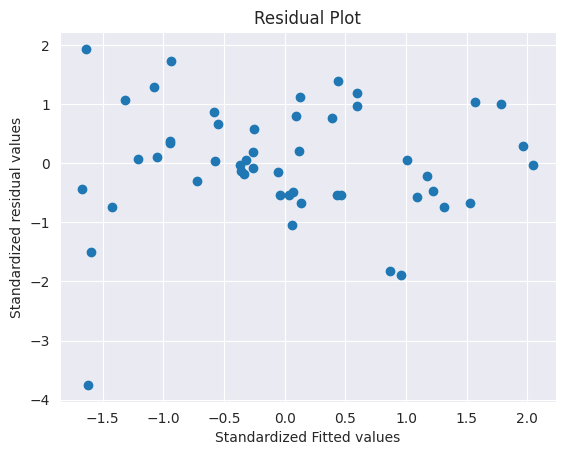

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#Residual Vs Regressors

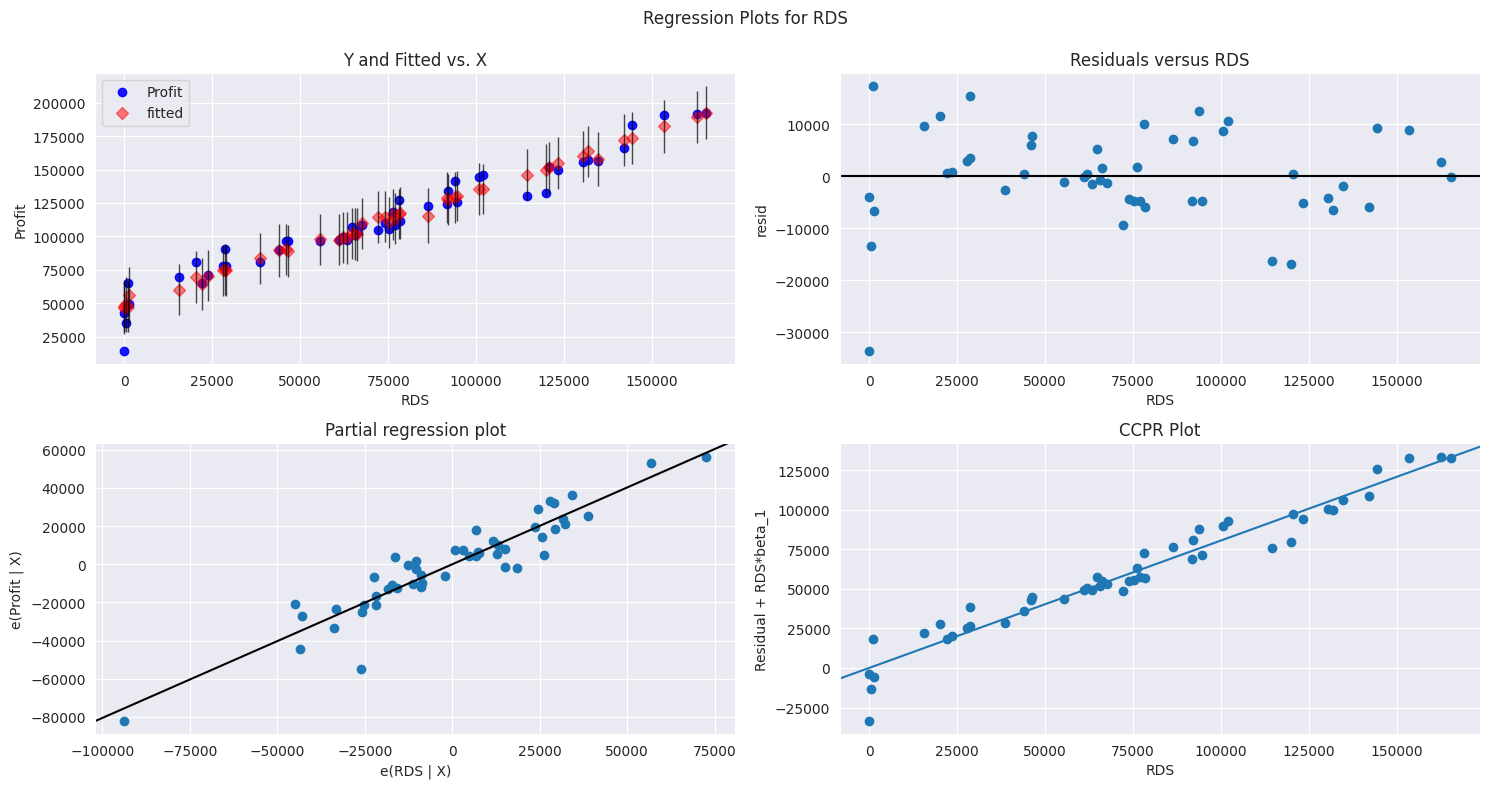

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()


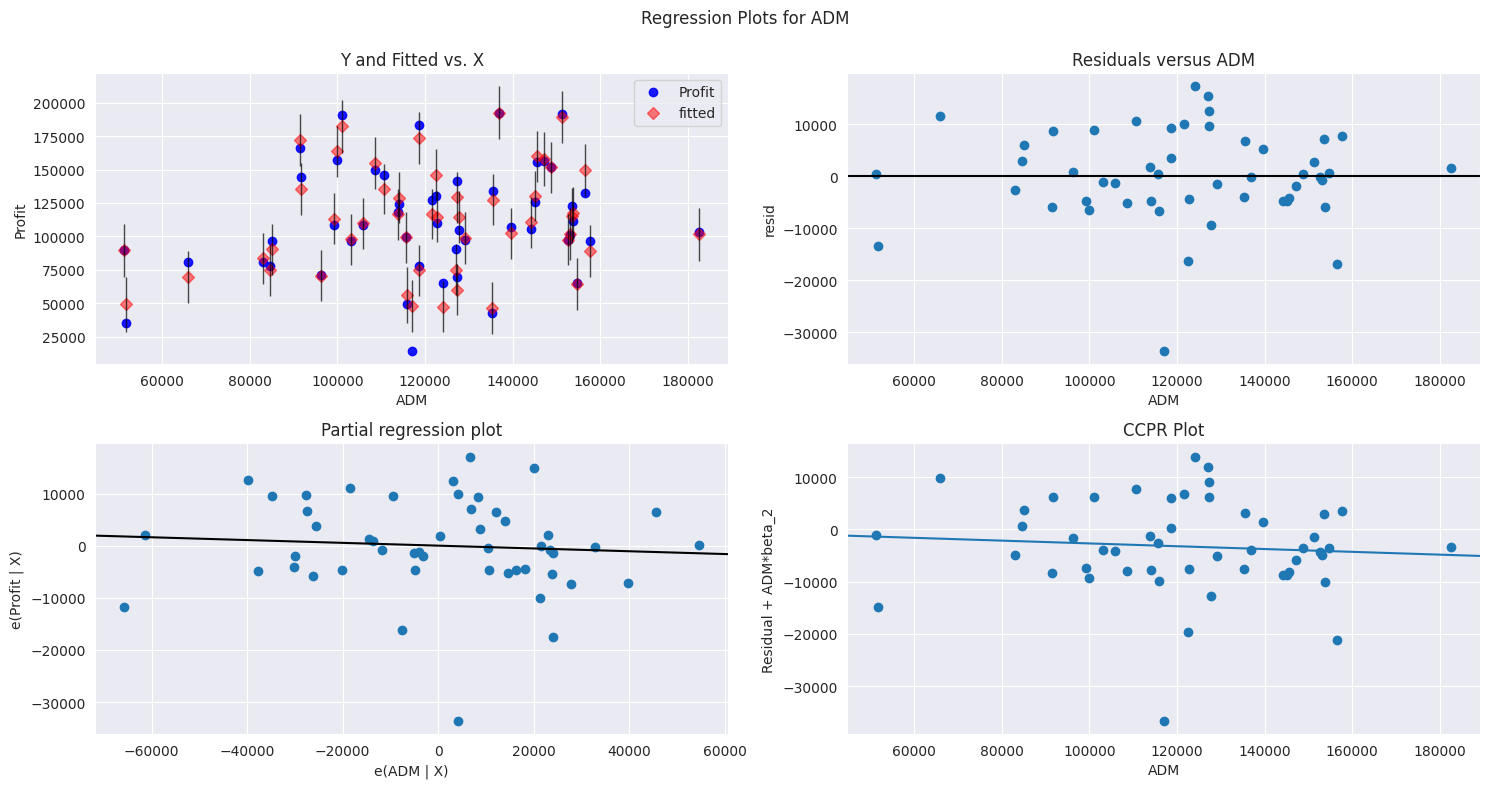

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"ADM", fig=fig)
plt.show()

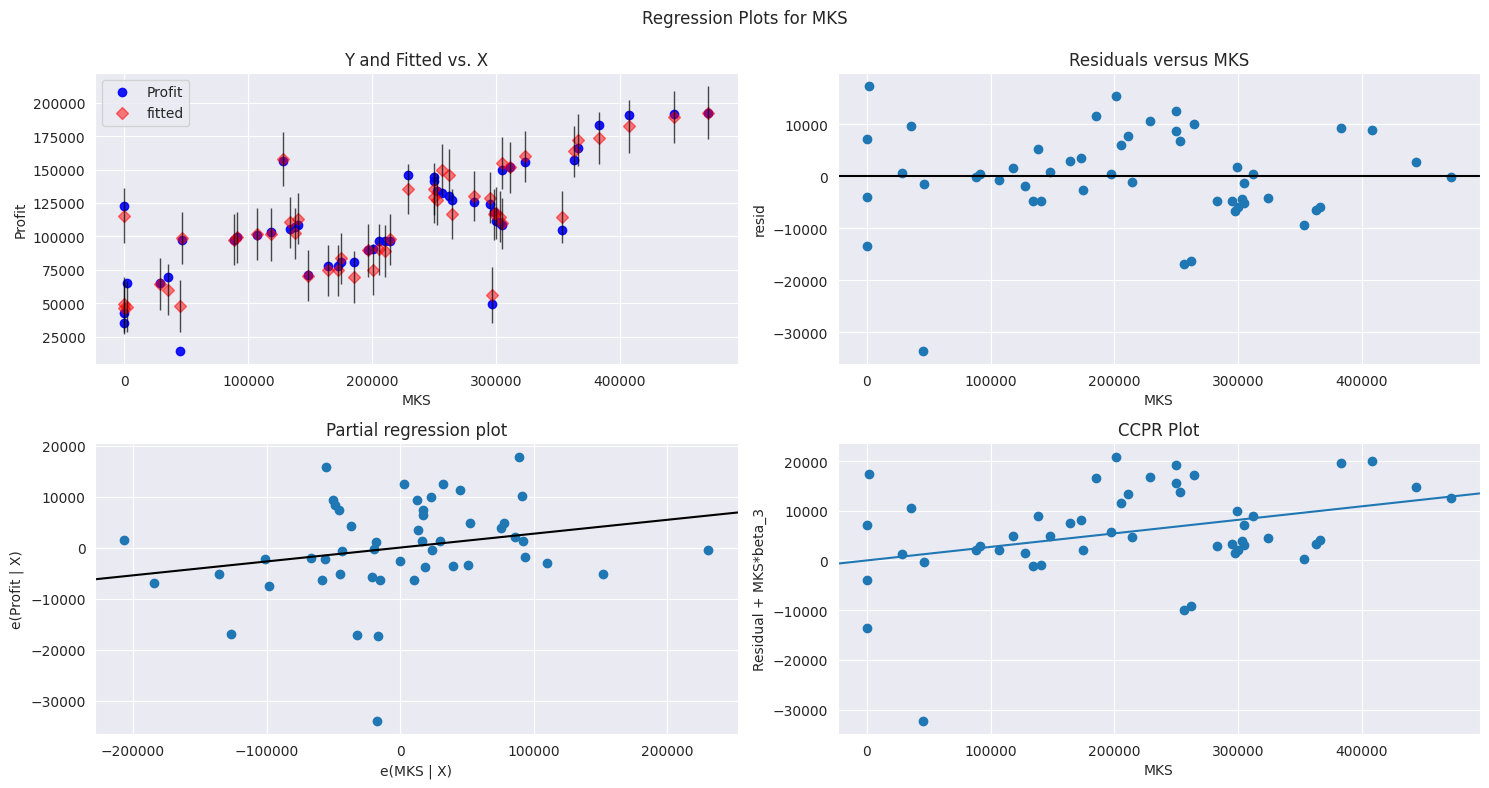

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKS", fig=fig)
plt.show()

#Model Deletion Diagnostics
#Detecting Influuencers / Outliers
#Cooks Distance

In [ ]:
  model_influence = model.get_influence()
  (c, _) = model_influence.cooks_distance

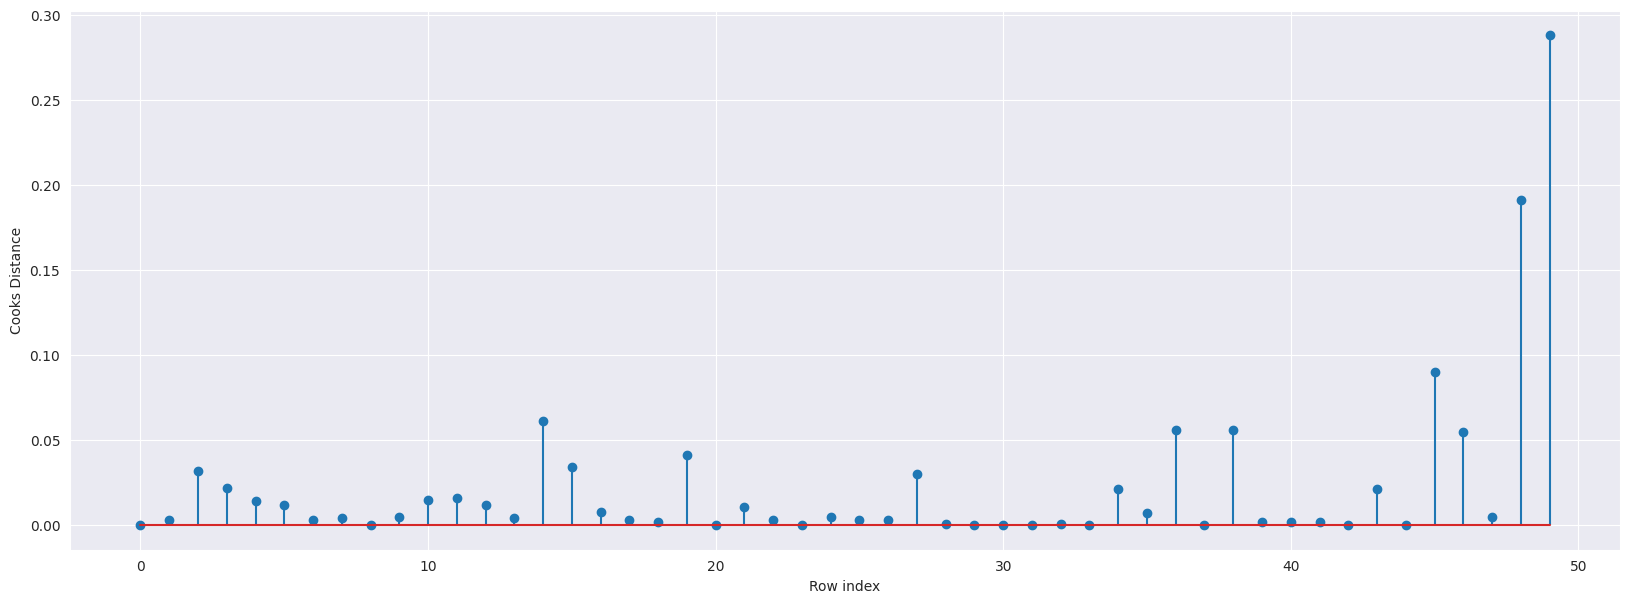

In [ ]:
#Plot the influencers values using stem plot
sns.set_style(style='darkgrid')
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dataset1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

There are no datapoints whose value is greater than 0.5

#High Influence Plots

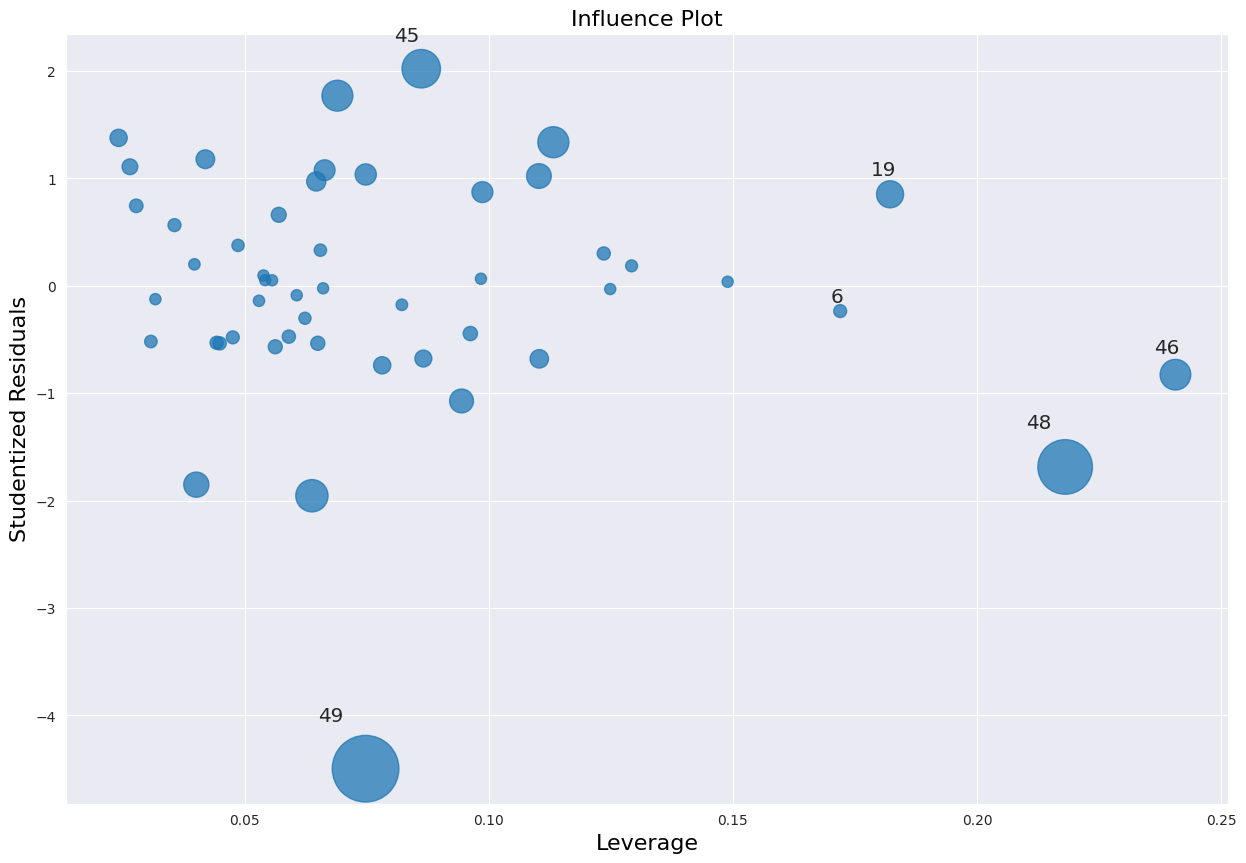

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
fig=influence_plot(model,ax = ax)

In [ ]:
k = dataset1.shape[1]     # k = no.of features/columns & n = no. of datapoints
n = dataset1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [ ]:
dataset1[dataset1.index.isin([49])]

,RDS,ADM,MKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
dataset1.shape

(50, 5)

#Improving the model

In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
dataset1=dataset1.copy()
dataset1

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
dataset1=dataset1.drop(dataset1.index[[49]],axis=0).reset_index(drop=True)
dataset1

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#Model Deletion Diagoniostics & Final Model

In [ ]:
Final_Model = smf.ols('Profit~RDS+ADM+MKS',data=dataset1).fit()

In [ ]:
Final_Model .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           8.85e-32
Time:                        08:38:00   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADM           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKS            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#New data for prediction
new_data=pd.DataFrame({'RDS':78000,'ADM':127864.55,"MKS":249839.44},index=[1])
new_data

,RDS,ADM,MKS
1,78000,127864.55,249839.44


In [ ]:
# Manual prediction
Final_Model.predict(new_data)

1    116922.172202
dtype: float64

In [ ]:
#Automatic Prediction
pred_y = Final_Model.predict(dataset1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

Table Containing R square values

In [ ]:
Prepared_Models=pd.DataFrame(['Model','Final_Model'],index=[1])
new_data

In [ ]:
d2={'Prepared_models':['Model','Final_Model'],'Rsquared':[model.rsquared,Final_Model.rsquared]}
table=pd.DataFrame(d2)
table

,Prepared_models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


# question 2

# Toyota Corolla

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla (2).csv


In [5]:
dataset2 = pd.read_csv('ToyotaCorolla.csv', encoding='ISO-8859-1')
dataset2

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
dataset2.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dataset2.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [7]:
dataset2.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [8]:
dataset2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [9]:
dataset2[dataset2.duplicated()]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


In [10]:
dataset2 = dataset2.iloc[:, :10]
dataset2


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1


# Correlation analysis

In [11]:
dataset2.corr()

<ipython-input-11-c2537068b960>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset2.corr()


,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000


# Scatter plot between variables with histogram

<Axes: >

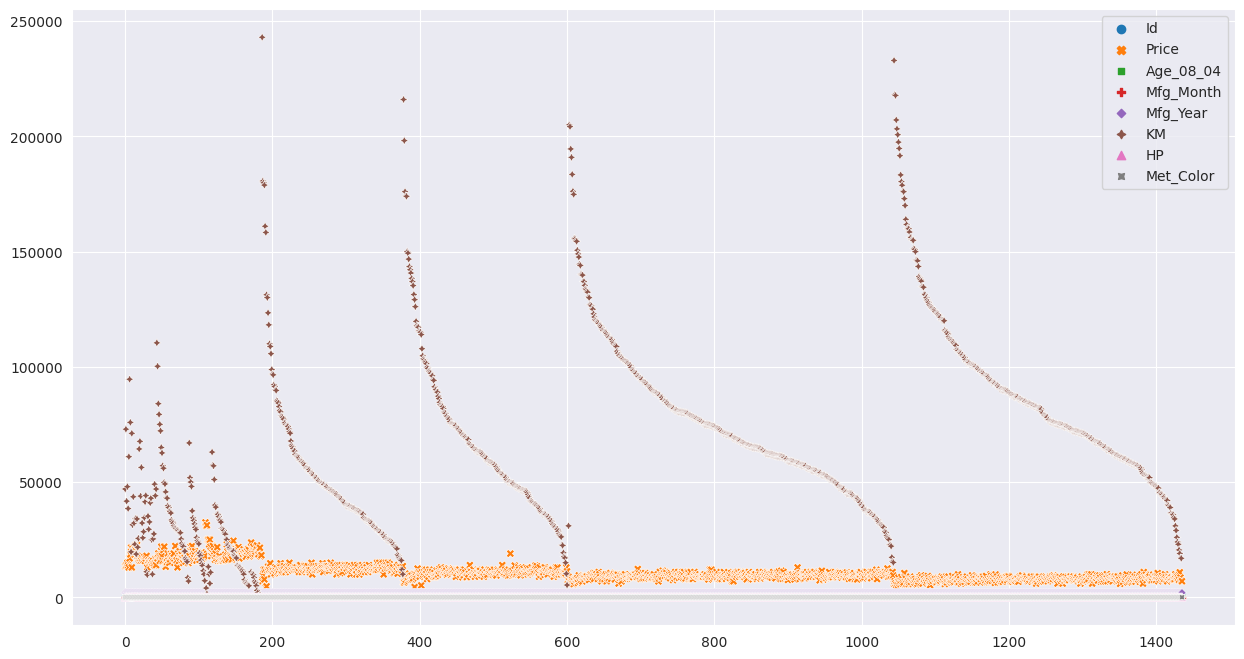

In [12]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(dataset2)

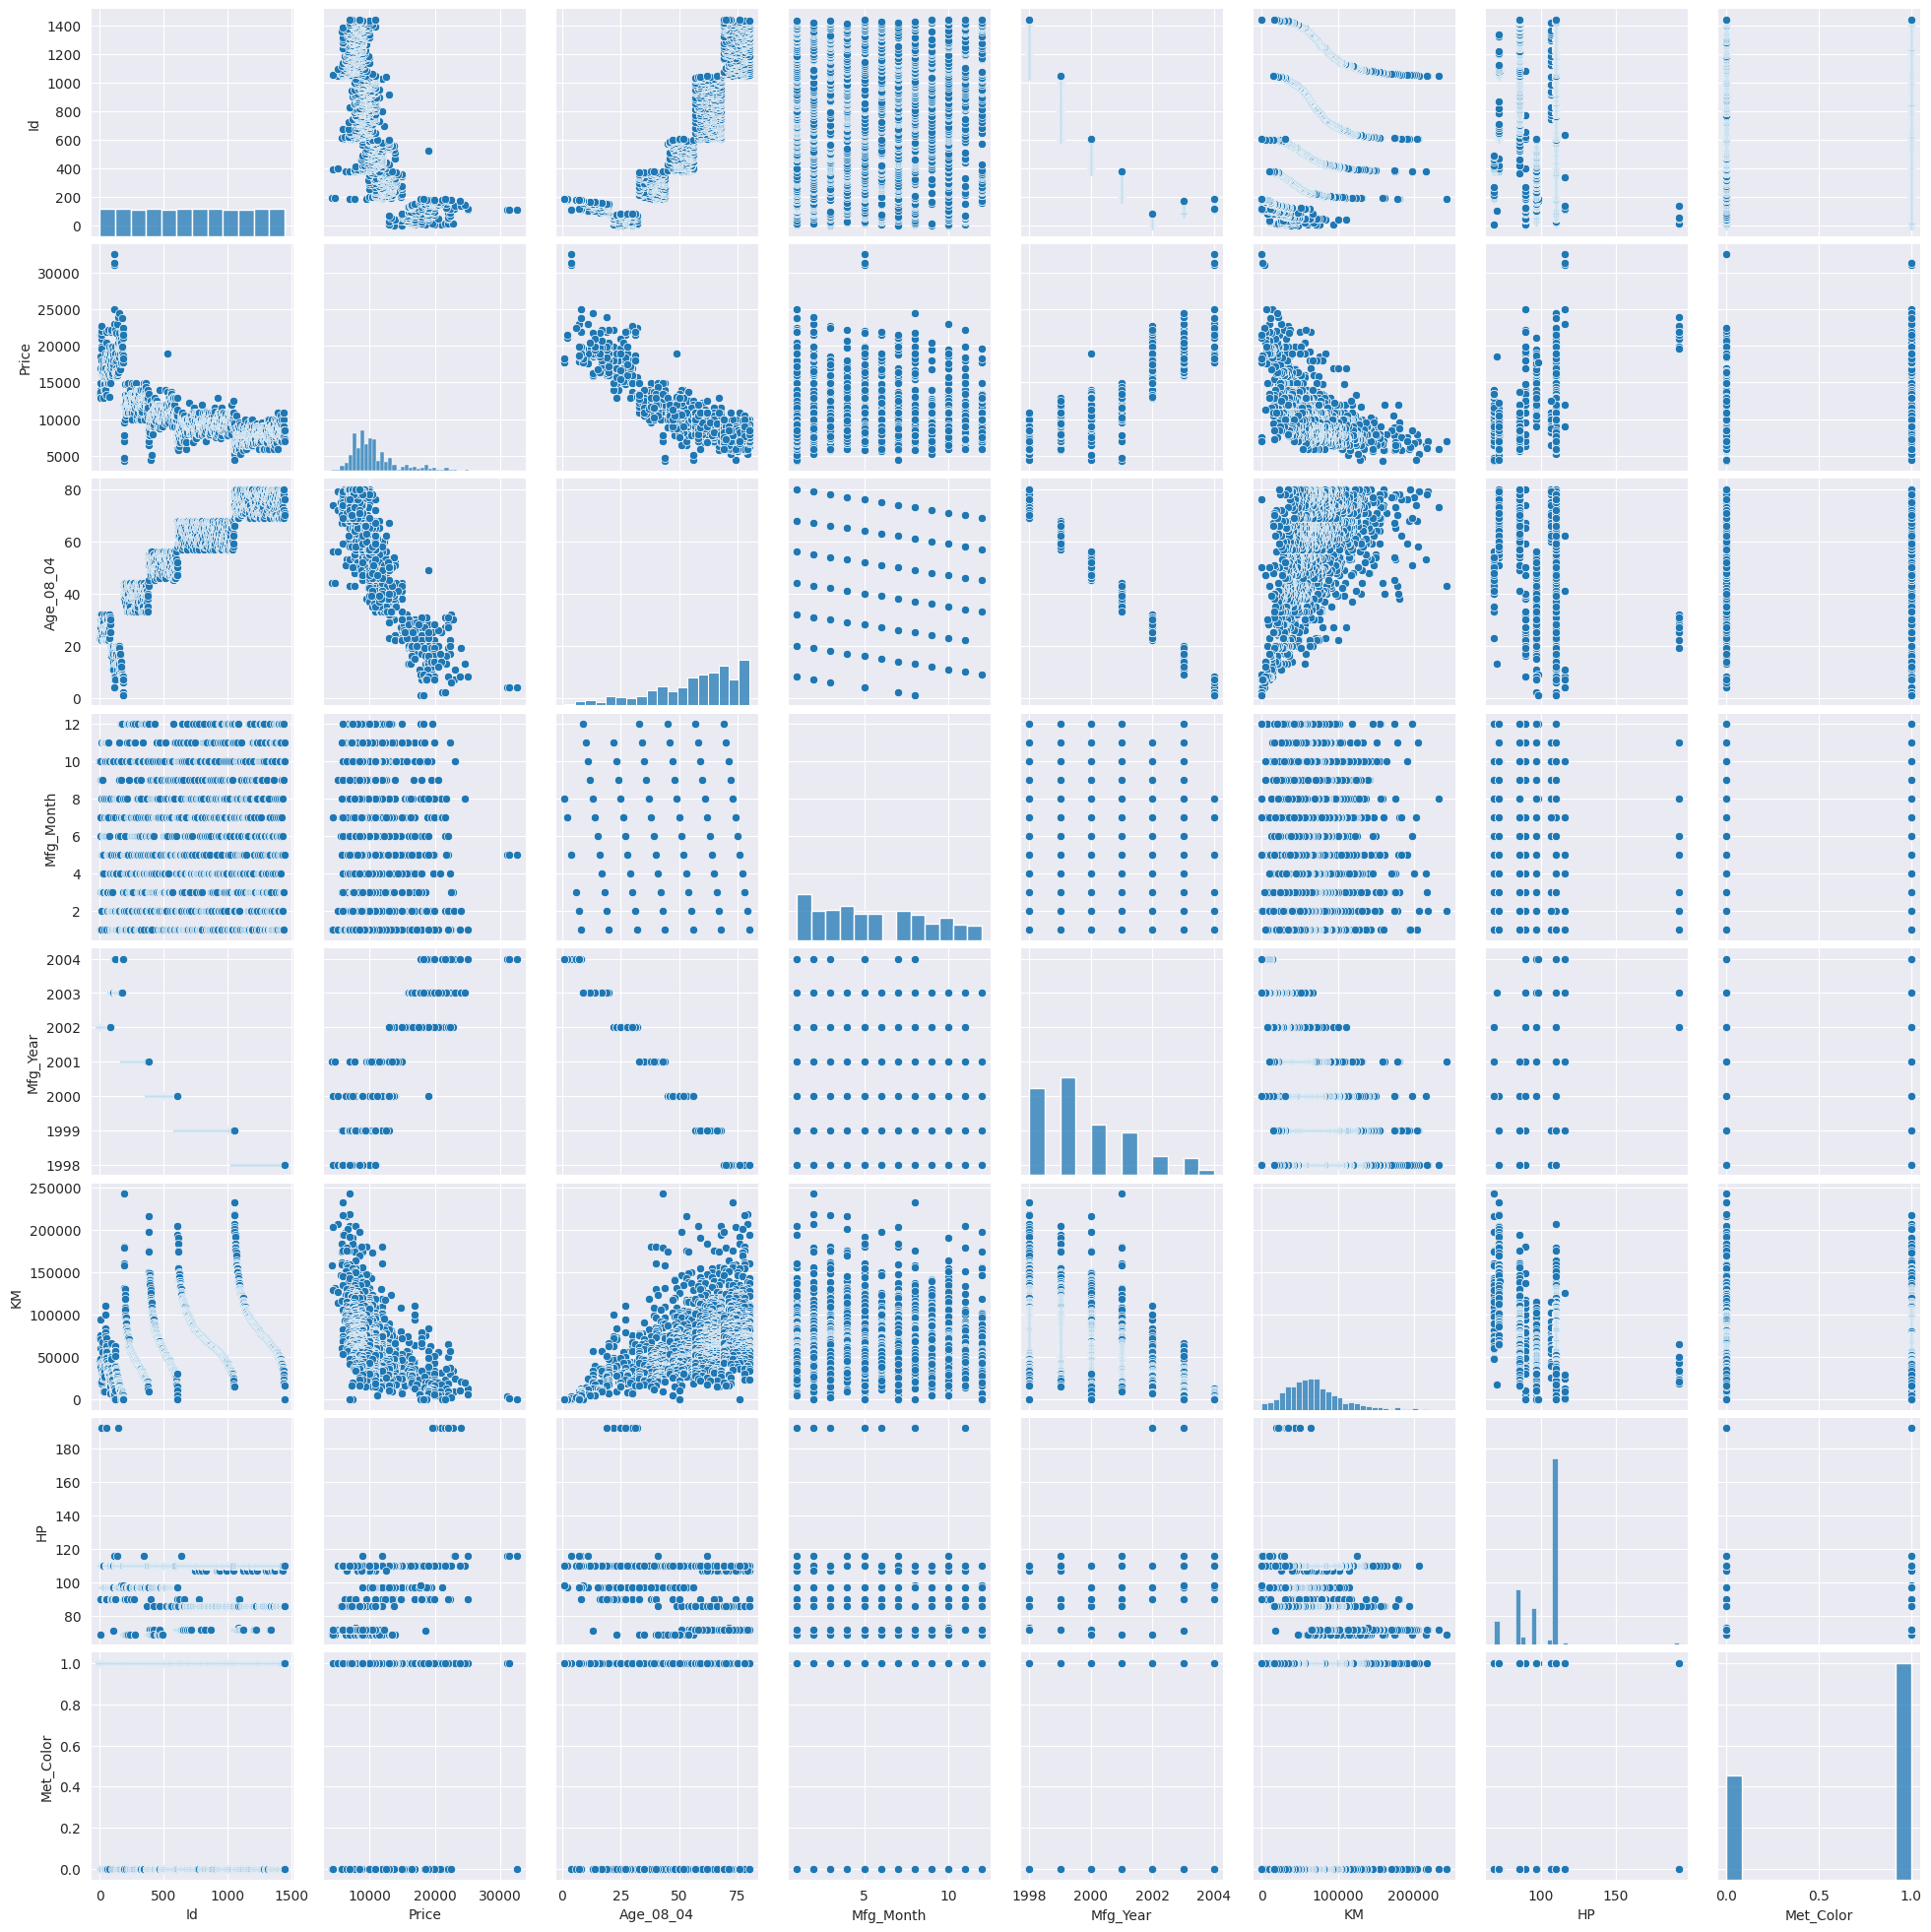

In [13]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(dataset2)

<Axes: ylabel='Count'>

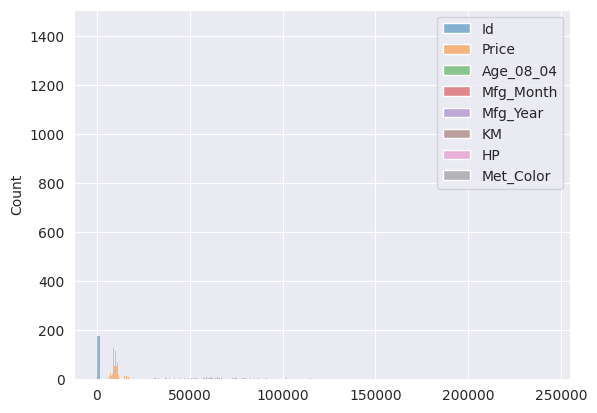

In [14]:
sns.histplot(dataset2)

<Axes: >

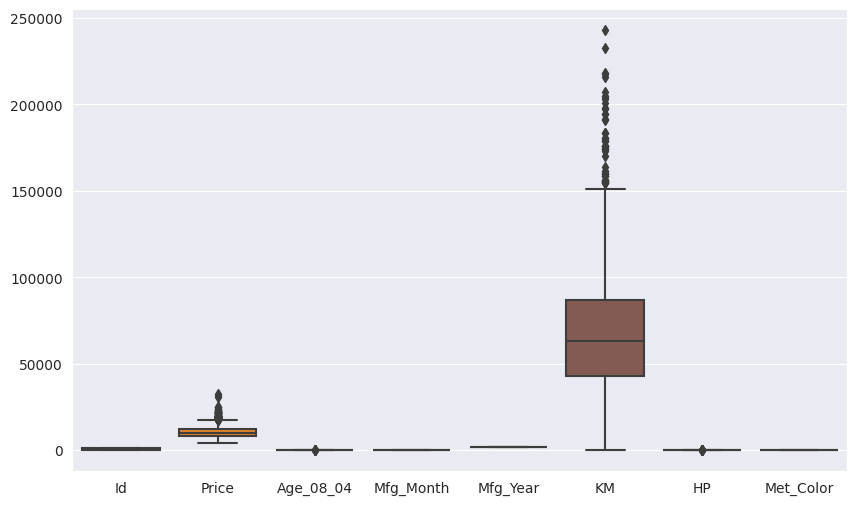

In [17]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(dataset2)

#Preparing a model

In [18]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+Mfg_Month+Mfg_Year+KM+HP+Met_Color',data=dataset2).fit()

In [21]:
model.params

Intercept     -0.007332
Age_08_04   -157.151076
Mfg_Month   -123.397918
Mfg_Year       8.679439
KM            -0.011015
HP            35.169008
Met_Color     55.111510
dtype: float64

In [23]:
model.fittedvalues

0       15230.567277
1       14944.728514
2       15254.915905
3       15063.027531
4       15032.653186
            ...     
1431     7870.675053
1432     7731.310543
1433     7786.916582
1434     7876.882707
1435     8649.619676
Length: 1436, dtype: float64

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1332.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:19:03   Log-Likelihood:                -12563.
No. Observations:                1436   AIC:                         2.514e+04
Df Residuals:                    1430   BIC:                         2.517e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0073      0.001    -14.442      0.000      -0.008      -0.006
Age_08_04   -157.1511      2.538    -61.928      0.000    -162.129    -152.173
Mfg_Month   -123.3979     12.142    -10.163      0.000    -147.215     -99.581
Mfg_Year       8.6794      0.179     48.582      0.000       8.329       9.030
KM            -0.0110      0.001     -8.430      0.000      -0.014      -0.008
HP            35.1690      2.861     12.294      0.000      29.558      40.780
Met_Color     55.1115     86.669      0.636      0.525    -114.900     225.123
==============================================================================
Omnibus:                      426.294   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3593.177
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                      10.408   Cond. No.                     1.04e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.11e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept   -14.441744
Age_08_04   -61.928212
Mfg_Month   -10.163286
Mfg_Year     48.581602
KM           -8.429601
HP           12.294284
Met_Color     0.635887
dtype: float64 
 Intercept     3.116668e-44
Age_08_04     0.000000e+00
Mfg_Month     1.775327e-23
Mfg_Year     5.636399e-305
KM            8.350677e-17
HP            4.273547e-33
Met_Color     5.249521e-01
dtype: float64


In [25]:
model.pvalues

Intercept     3.116668e-44
Age_08_04     0.000000e+00
Mfg_Month     1.775327e-23
Mfg_Year     5.636399e-305
KM            8.350677e-17
HP            4.273547e-33
Met_Color     5.249521e-01
dtype: float64

In [26]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8232384304683446, 0.8226203830224297)

#Simple Linear Regression Models

In [27]:
ml_v=smf.ols('Price~KM',data = dataset2).fit()
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [28]:
ml_v=smf.ols('Price~HP',data = dataset2).fit()
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [29]:
ml_v=smf.ols('Price~KM+HP',data = dataset2).fit()
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    17.060866
KM          -23.020336
HP            6.183984
dtype: float64 
 Intercept     1.468198e-59
KM           4.902715e-100
HP            8.136379e-10
dtype: float64


#Calculating VIF (Variance Inflation Factor)

#Residual Analysis

#Test for Normality of Residuals (Q-Q Plot)

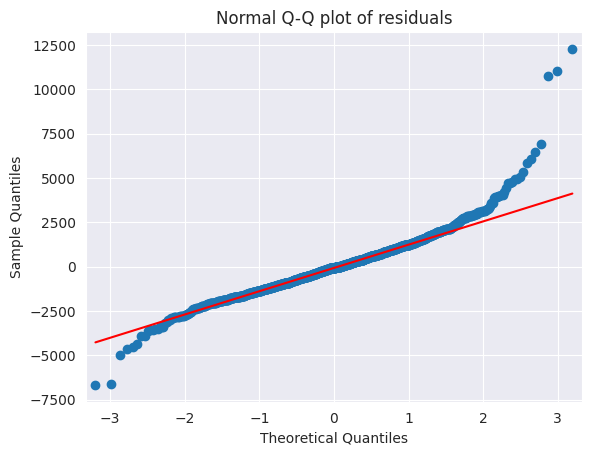

In [30]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [31]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   11,   12,   13,   14,   15,   16,   17,
          18,   19,   20,   21,   22,   23,   24,   26,   28,   29,   31,
          32,   35,   36,   38,   41,   43,   44,   45,   46,   47,   48,
          49,   50,   51,   52,   53,   58,   59,   61,   62,   63,   64,
          65,   66,   68,   69,   70,   72,   73,   74,   75,   76,   77,
          78,   80,   81,   83,   84,   85,   87,   89,   91,   92,   94,
          95,   98,   99,  100,  102,  103,  104,  106,  109,  110,  111,
         112,  113,  114,  115,  116,  118,  119,  120,  121,  123,  125,
         128,  136,  138,  139,  141,  142,  143,  144,  146,  147,  148,
         149,  151,  152,  153,  154,  156,  157,  158,  159,  160,  161,
         162,  163,  165,  166,  167,  168,  171,  172,  174,  175,  177,
         178,  179,  182,  183,  188,  190,  193,  194,  196,  197,  204,
         210,  211,  214,  216,  223,  237,  238,  243,  253,  268,  270,
         272,  279,  283,  294,  302, 

<Axes: >

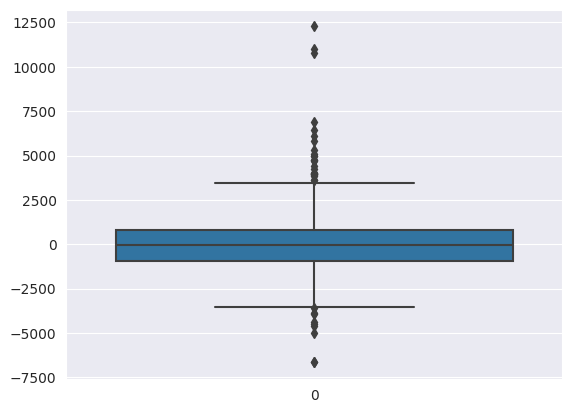

In [32]:
sns.boxplot(model.resid)

#Residual Plot for Homoscedasticity

In [35]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

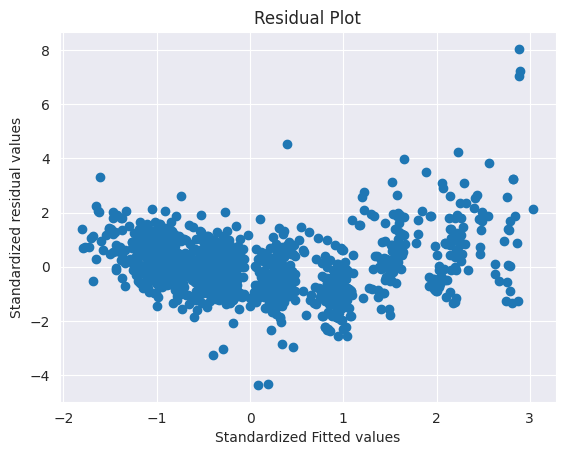

In [37]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [38]:
get_standardized_values(model.resid).mean()

3.9584553524239565e-17

#Residual Vs Regressors

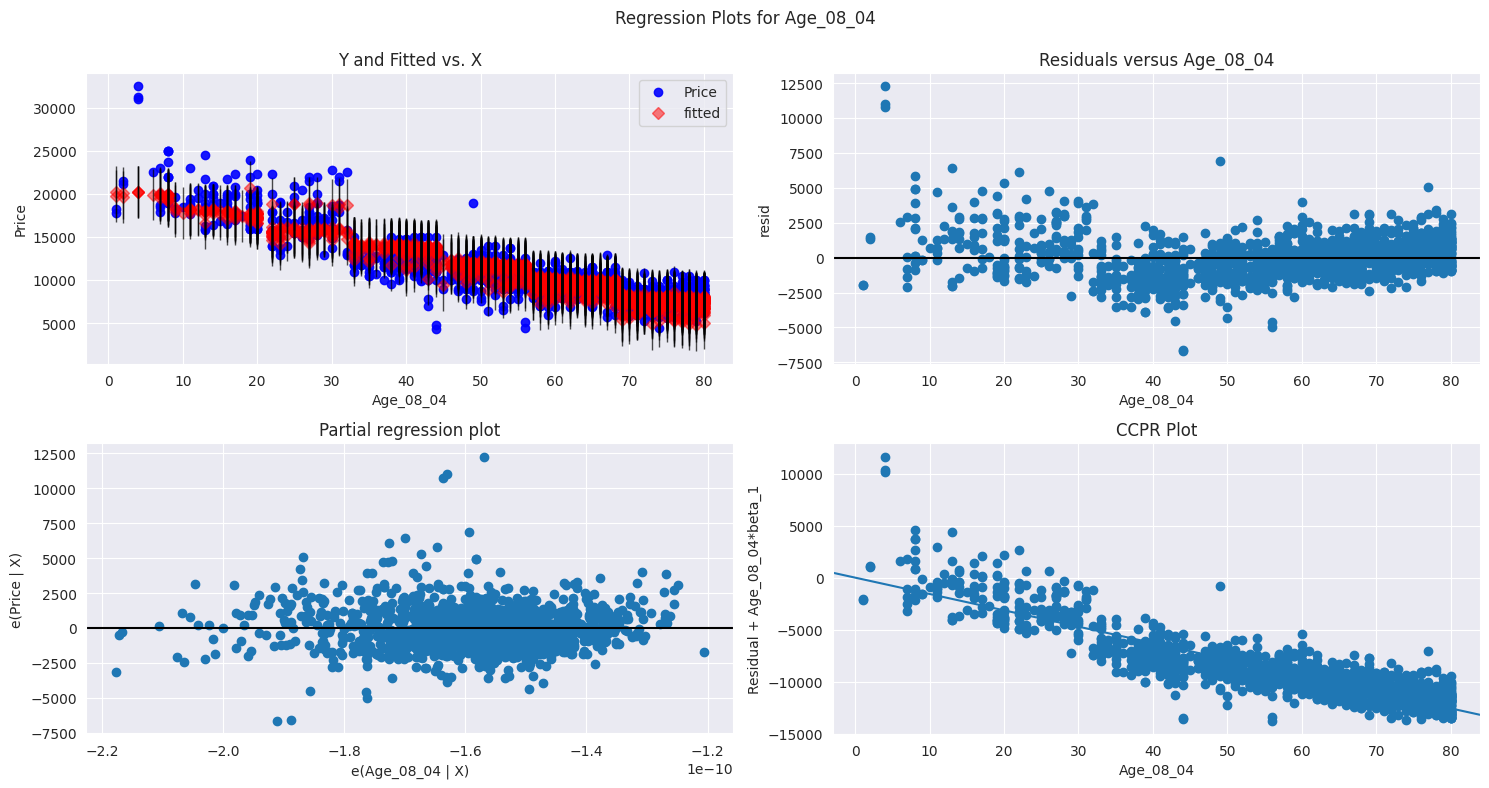

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

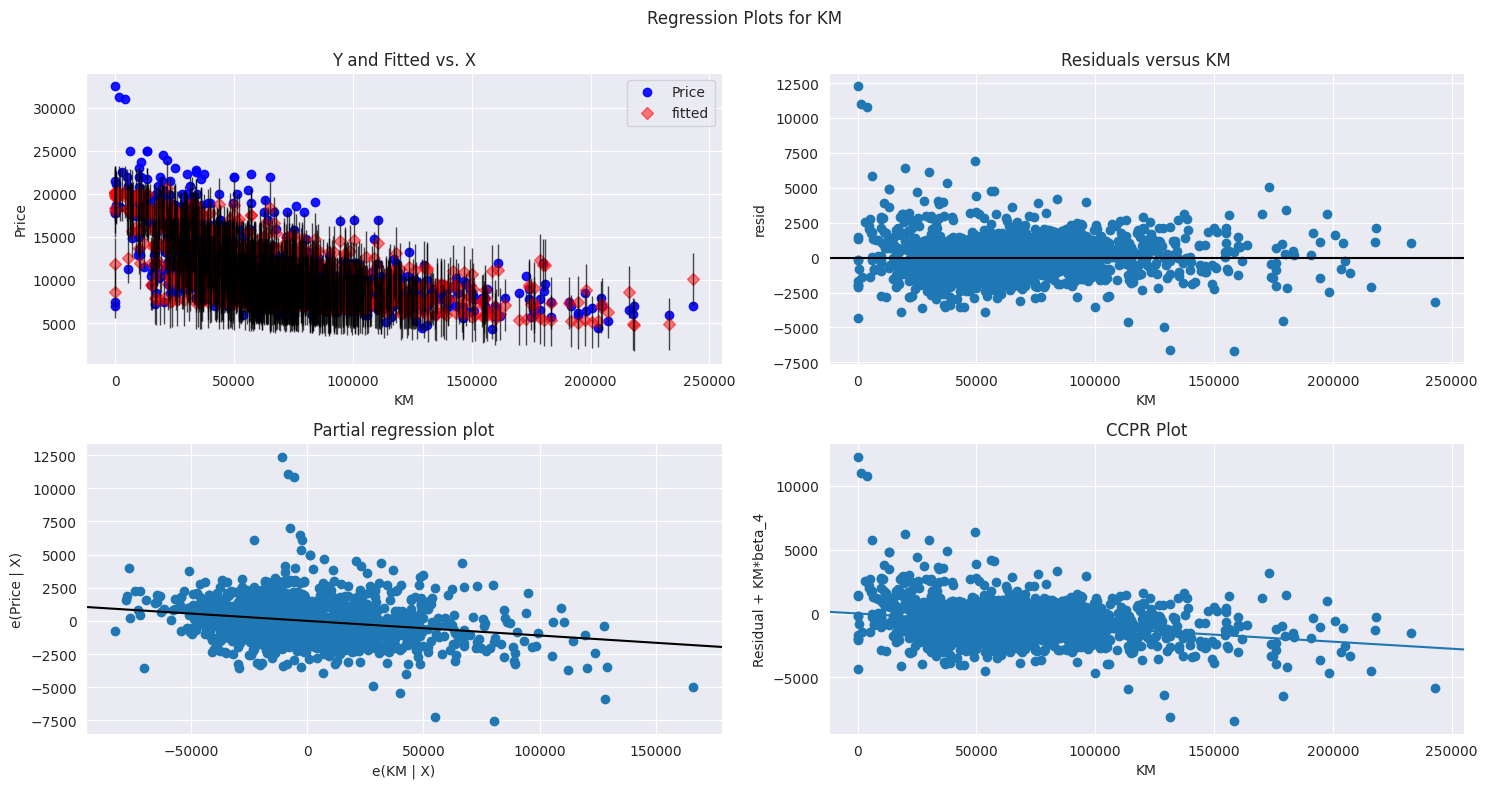

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

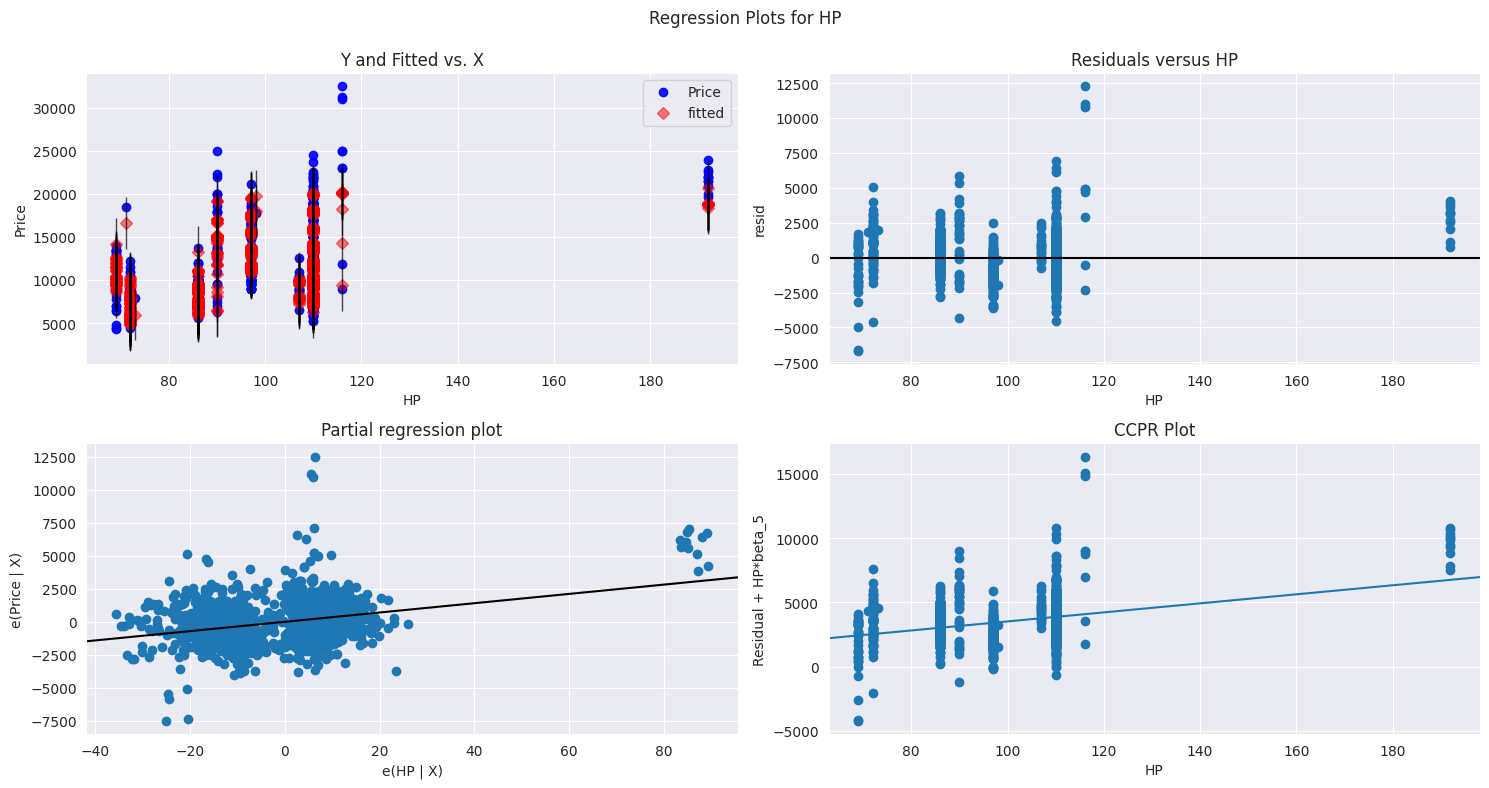

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

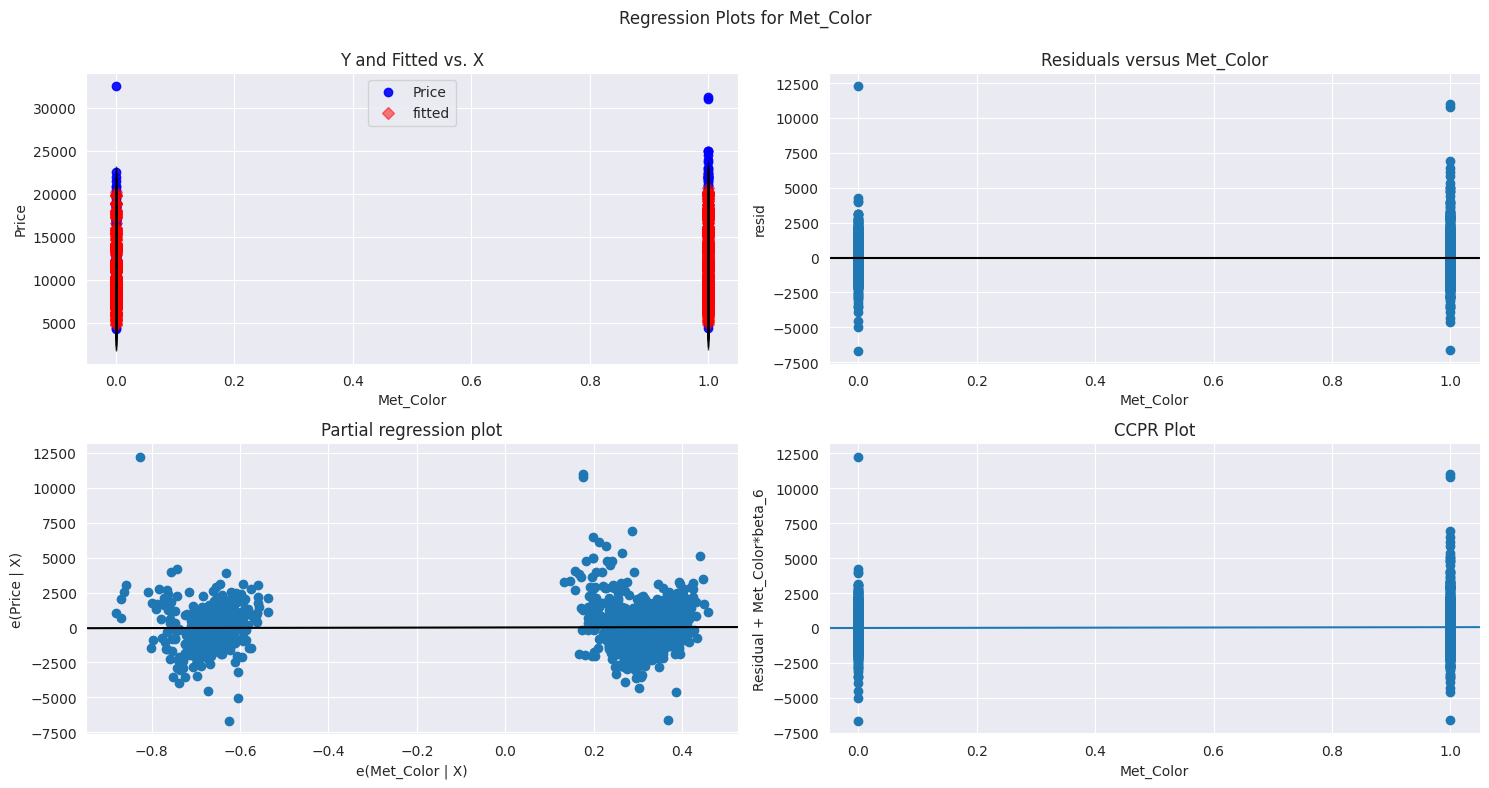

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Met_Color", fig=fig)
plt.show()

#Transformations on Independent Variables
- Log Transformation
- Square Transformation
- Square Root Transformation
- Cube Transformation
- Cube Root Transformation

In [45]:
dataset2['SQRT_HP']=np.sqrt(dataset2['HP'])
dataset2

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,SQRT_HP
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,9.486833
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,9.486833
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,9.486833
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,9.486833
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,9.486833
...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,9.273618
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,9.273618
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,9.273618
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,9.273618


In [48]:
#Build model
#import statsmodels.formula.api as smf
model = smf.ols('Price~KM+Met_Color+Age_08_04+SQRT_HP',data=dataset2).fit()
model

#Model Deletion Diagnostics

#Detecting Influencers/Outliers

#Cook’s Distance

In [49]:
dataset2.shape

(1436, 11)

In [50]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [51]:
c

array([1.48611704e-03, 9.63945929e-04, 8.14246703e-04, ...,
       4.00342756e-06, 9.45187325e-04, 1.97568947e-03])

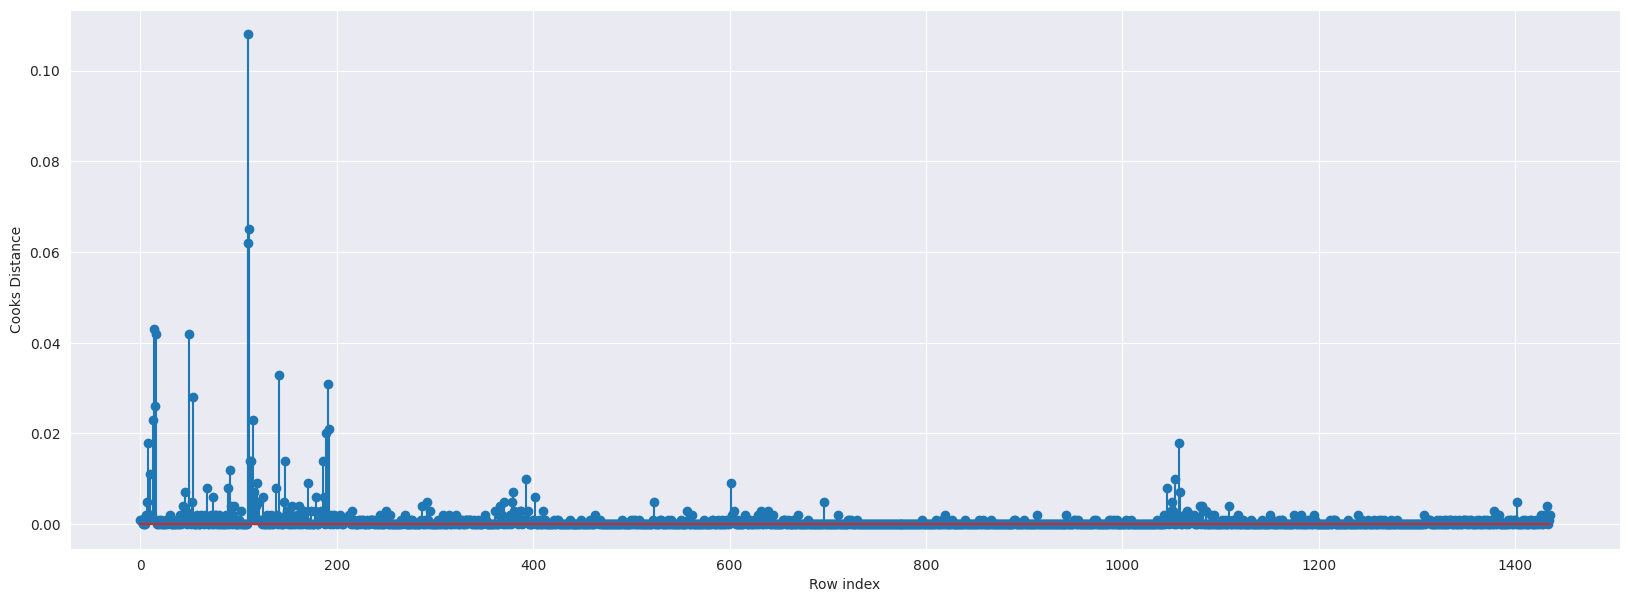

In [52]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dataset2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(109, 0.10762841247191211)

#High Influence points

<Figure size 1500x1000 with 0 Axes>

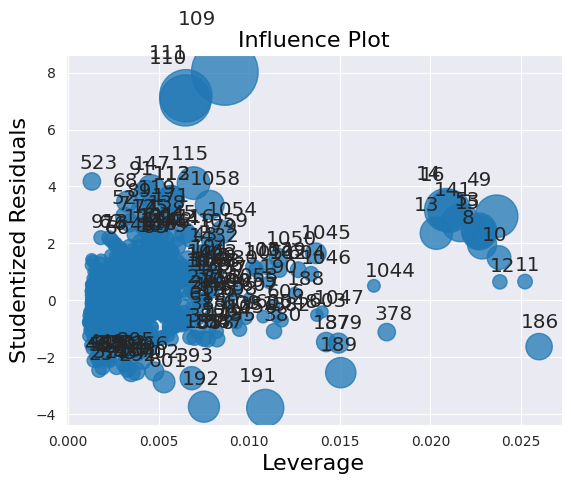

In [56]:
from statsmodels.graphics.regressionplots import influence_plot
fig = plt.figure(figsize=(15,10))
influence_plot(model)
plt.show()

In [57]:
dataset2.shape

(1436, 11)

In [58]:
#k= number of variables (columns)
#n= number of observations (rows)
k = 4
n = 81
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.18518518518518517

#From the above plot, it is evident that data point 70 and 76 are the influencers

In [60]:
dataset2[dataset2.index.isin([221, 960, 601])]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,SQRT_HP
221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,1,2001,74172,Petrol,110,1,10.488088
601,605,TOYOTA Corolla 2.0 d HB Diesel 2/3-Doors,7500,50,7,2000,1,Diesel,90,1,9.486833
960,964,TOYOTA Corolla,9390,66,3,1999,50806,Petrol,86,0,9.273618


In [61]:
dataset2.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,SQRT_HP
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,9.486833
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,9.486833
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,9.486833
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,9.486833
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,9.486833


#Improving the model

In [62]:
#Discard the data points which are influencers and reasign the row number (reset_index())
dataset3=dataset2.drop(dataset2.index[76],axis=0).reset_index()

In [64]:
dataset3

,index,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,SQRT_HP
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,9.486833
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,9.486833
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,9.486833
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,9.486833
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,9.486833
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,9.273618
1431,1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,9.273618
1432,1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,9.273618
1433,1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,9.273618


#Build Model

In [66]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age_08_04+KM+HP',data = dataset3).fit()

In [67]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8102567996252722, 25213.317697703715)

In [68]:
((final_ml_V.resid)**2).mean()

2487538.5764923575

In [70]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('Price~Age_08_04+KM+HP',data = dataset3).fit()

In [71]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8102567996252722, 25213.317697703715)

In [72]:
((final_ml_W.resid)**2).mean()

2487538.5764923575

# Cook’s Distance

In [73]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

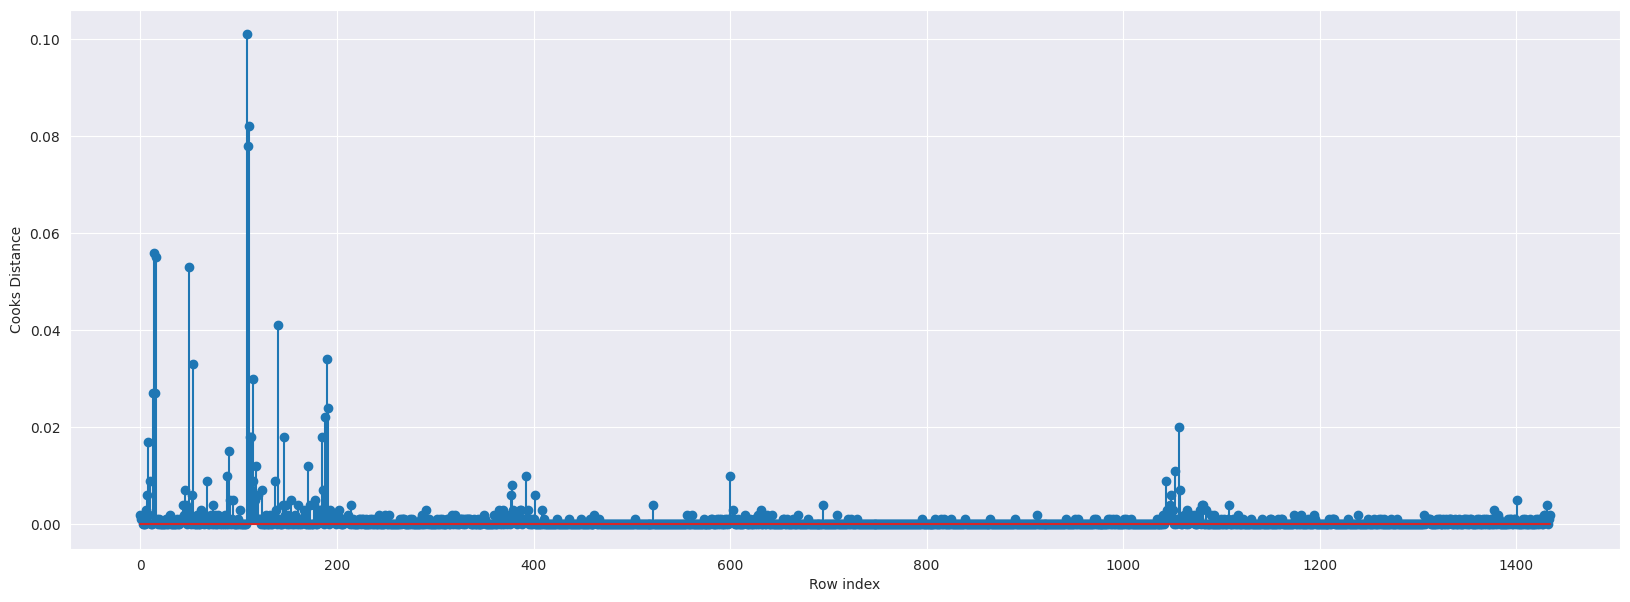

In [75]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dataset3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [76]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(108, 0.10080341720904752)

In [78]:
#Drop 76 and 77 observations
dataset4=dataset3.drop(dataset3.index[[76,77]],axis=0)

In [79]:
dataset4

,index,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,SQRT_HP
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,9.486833
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,9.486833
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,9.486833
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,9.486833
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,9.486833
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,9.273618
1431,1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,9.273618
1432,1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,9.273618
1433,1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,9.273618


In [80]:
#Reset the index and re arrange the row values
dataset5=dataset4.reset_index()

In [81]:
dataset5=dataset4.drop(['index'],axis=1)

In [82]:
dataset5

,level_0,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,SQRT_HP
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,9.486833
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,9.486833
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,9.486833
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,9.486833
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,9.486833
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,9.273618
1431,1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,9.273618
1432,1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,9.273618
1433,1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,9.273618


In [83]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age_08_04+KM+HP',data = dataset5).fit()

In [84]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

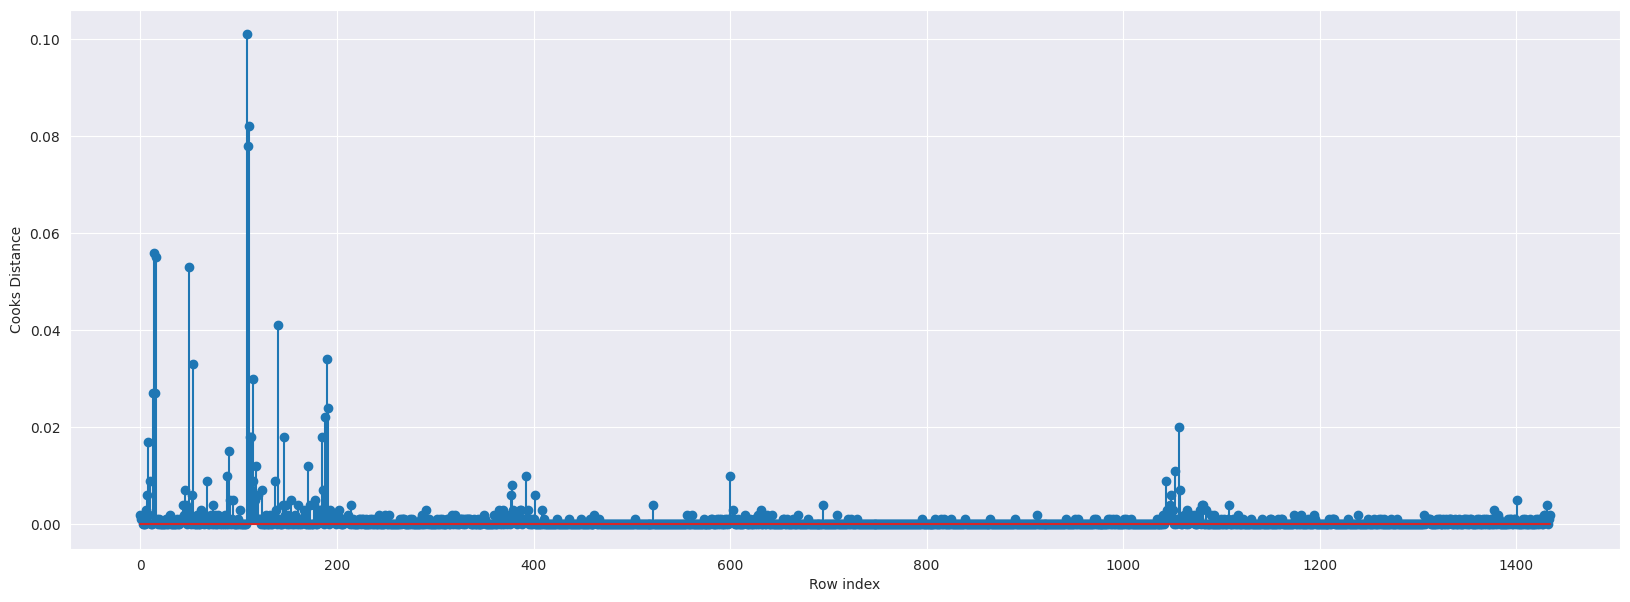

In [85]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dataset5)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [86]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(108, 0.10080341720904752)

In [87]:
#k= number of variables (columns)
#n= number of observations (rows)
k = 3
n = 79
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.1518987341772152

Since the value is <1 , we can stop the diagnostic process and finalize the model

In [88]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Price~Age_08_04+KM+HP',data = dataset5).fit()

In [89]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8102567996252722, 25213.317697703715)

#Predicting for new data

In [90]:
#New data for prediction
new_data=pd.DataFrame({'HP':40,"Age_08_04":95,"KM":102,"Met_color":35},index=[1])

In [91]:
new_data

,HP,Age_08_04,KM,Met_color
1,40,95,102,35


In [92]:
final_ml_V.predict(new_data)

1    3226.729333
dtype: float64

In [98]:
#final_ml_V.predict(dataset2_new.iloc[0:5,])

In [ ]:
#pred_y = final_ml_V.predict(dataset2_new)

In [ ]:
#pred_y